<a href="https://colab.research.google.com/github/AadeshVarude/FaceSwap/blob/main/Face_swap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
from copy import deepcopy
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import argparse
import imutils
import random
import math
from imutils import face_utils
from scipy.interpolate import interp2d
import os
import dlib

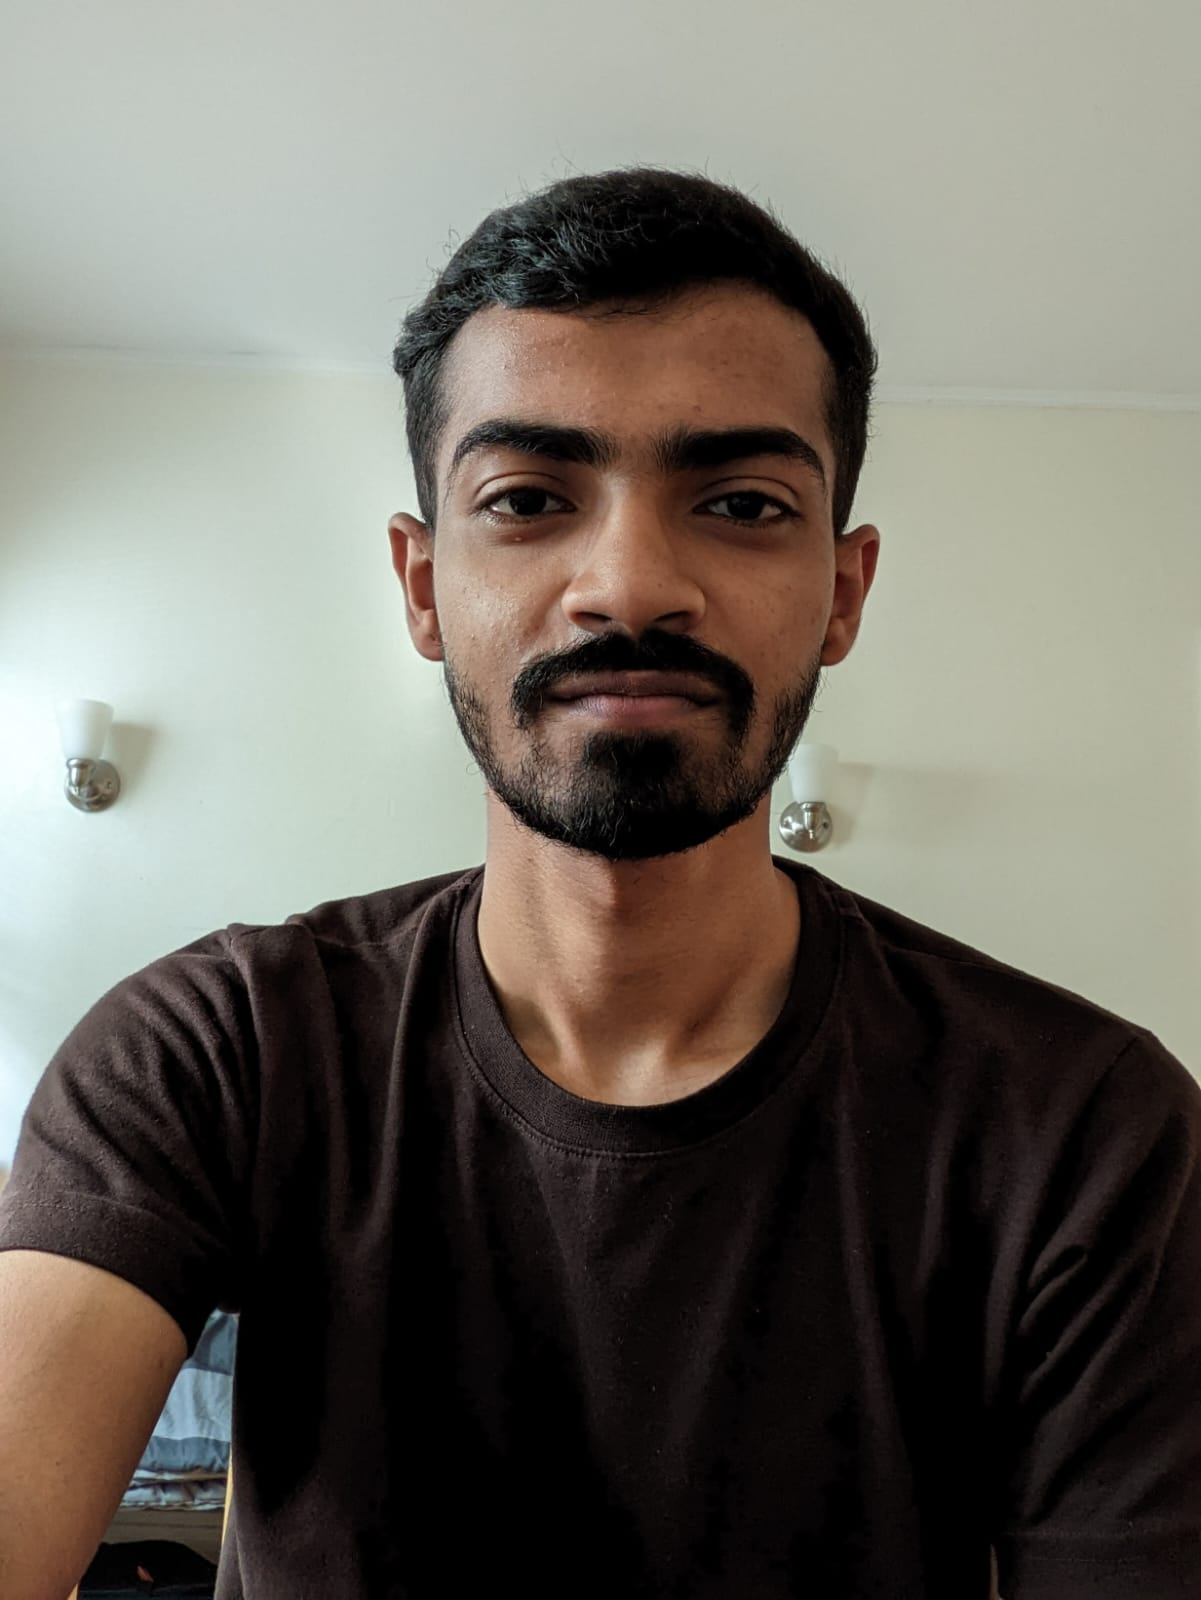

In [ ]:
img1=cv2.imread("/content/aadesh.jpeg")
cv2_imshow(img1)

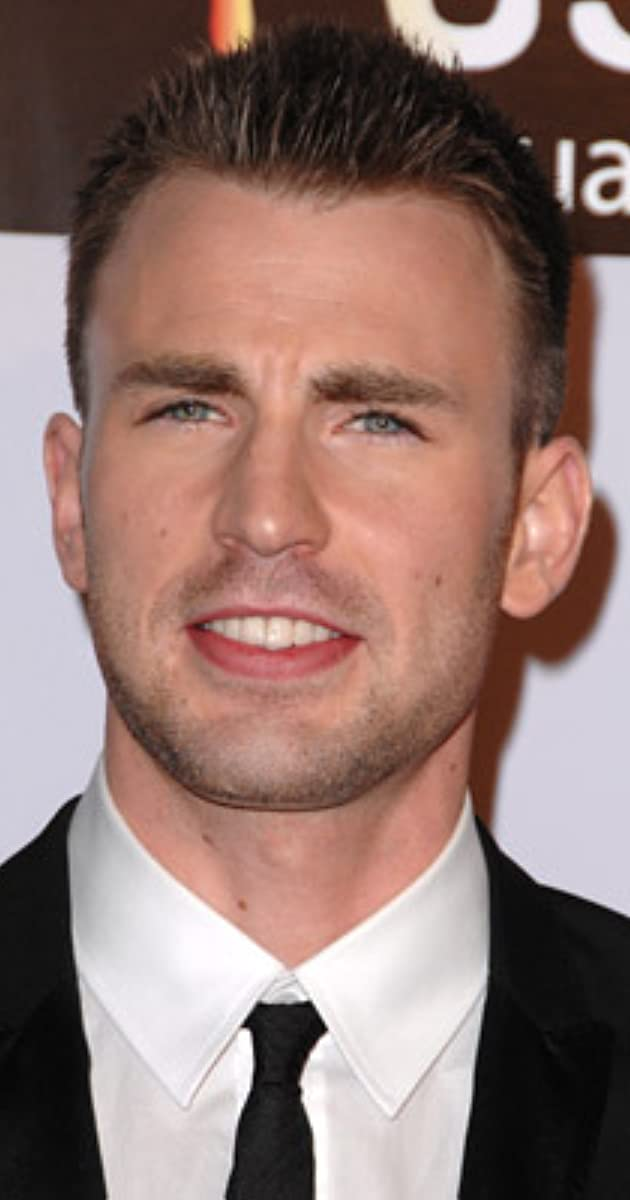

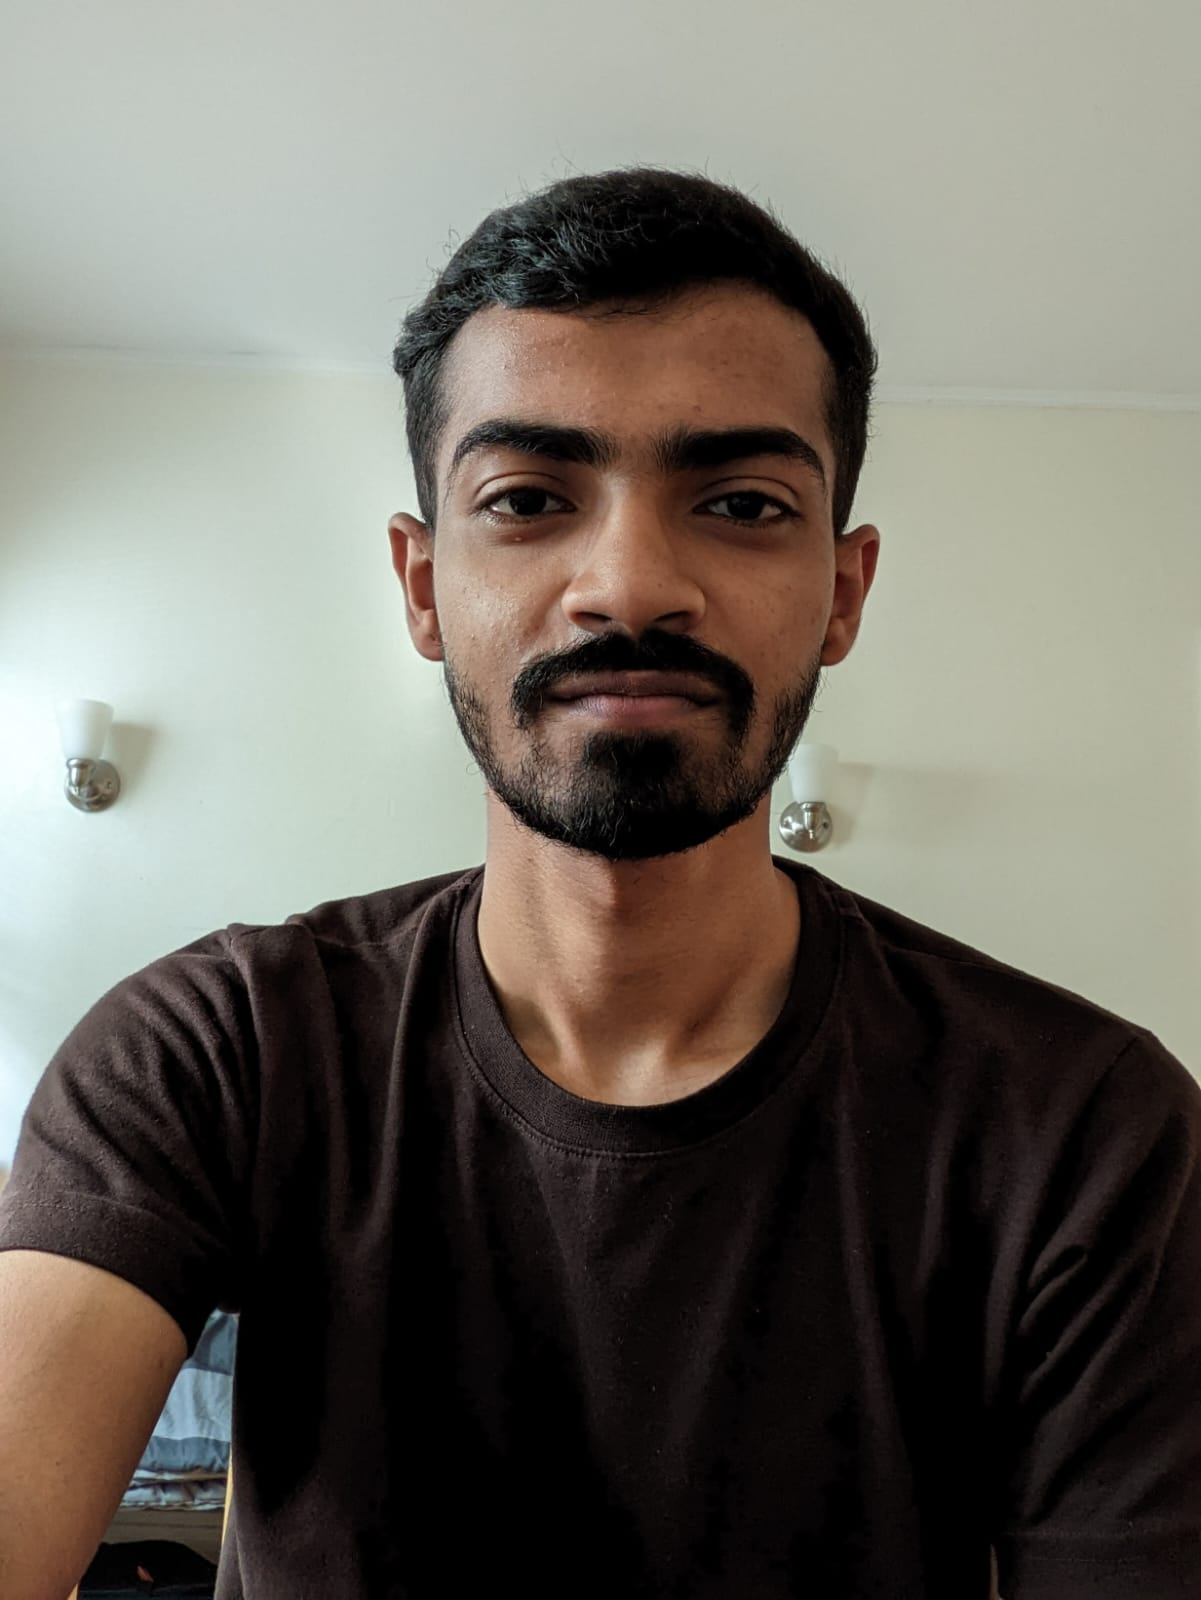

In [ ]:
img=cv2.imread("/content/referenc_cap.jpg")
img1=cv2.imread("/content/aadesh.jpeg")
cv2_imshow(img)
cv2_imshow(img1)

In [ ]:
p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 1)
count=0
for (i, rect) in enumerate(rects):
  # Make the prediction and transfom it to numpy array
  points = predictor(gray, rect)
  points = face_utils.shape_to_np(points)
  # print(len(points))
  # for (x, y) in points:
  #   cv2.circle(img, (x, y), 5, (255, 0, 0), -1)

 #x and y here are pixel co ordinates
# cv2_imshow(img)
print(len(rects))

1


In [ ]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
rects1 = detector(gray1, 1)
count=0
for (i, rect) in enumerate(rects1):
  # Make the prediction and transfom it to numpy array
  points1 = predictor(gray1, rect)
  points1 = face_utils.shape_to_np(points1)
  # for (x, y) in points1:
  #   count+=1
  #   cv2.circle(img1, (x, y), 5, (255,0, 0), -1)

 #x and y here are pixel co ordinates
# cv2_imshow(img1)
# count


In [ ]:
def rect_contains(rect, point) :
  if point[0] < rect[0] :
    return False
  elif point[1] < rect[1] :
    return False
  elif point[0] > rect[2] :
    return False
  elif point[1] > rect[3] :
    return False
  return True


In [ ]:
import array
def draw_delaunay(img,points,points1,delaunay_color):
  t_list_1=[]
  t_list=[]
  size = img.shape
  rect = (0, 0, size[1], size[0])
  subdiv=cv2.Subdiv2D(rect)
  img1_indices={}
  for i in range(68):
    img1_indices[(points[i][0],points[i][1])]=i
    subdiv.insert((int(points[i][0]),int(points[i][1])))
  triangleList = subdiv.getTriangleList()
  size = img.shape
  print(img1_indices)
  r = (0, 0, size[1], size[0])
  for t in triangleList:
    t_li=[]
    pt1 = (t[0], t[1])
    pt2 = (t[2], t[3])
    pt3 = (t[4], t[5])
    # print(pt1)
    ptc1=img1_indices[pt1]
    # print(ptc1)
    ptc2=img1_indices[pt2]
    # print(ptc2)
    ptc3=img1_indices[pt3]
    t_li.append(points1[ptc1][0])
    t_li.append(points1[ptc1][1])
    t_li.append(points1[ptc2][0])
    t_li.append(points1[ptc2][1])
    t_li.append(points1[ptc3][0])
    t_li.append(points1[ptc3][1])
    t_list.append(t_li)
    t_list_1.append(t)


  return t_list_1,t_list






In [ ]:
t_list_1,t_list=draw_delaunay(img1,points1,points,(255,0,0) )


{(427, 513): 0, (430, 571): 1, (437, 628): 2, (447, 683): 3, (464, 734): 4, (491, 777): 5, (528, 813): 6, (573, 840): 7, (627, 845): 8, (684, 840): 9, (732, 816): 10, (770, 782): 11, (800, 740): 12, (819, 689): 13, (833, 636): 14, (840, 580): 15, (842, 523): 16, (444, 467): 17, (470, 428): 18, (516, 418): 19, (564, 425): 20, (611, 441): 21, (655, 442): 22, (704, 427): 23, (755, 424): 24, (804, 436): 25, (829, 478): 26, (632, 485): 27, (632, 519): 28, (632, 554): 29, (632, 591): 30, (578, 623): 31, (606, 628): 32, (633, 635): 33, (660, 629): 34, (688, 624): 35, (485, 506): 36, (510, 492): 37, (540, 491): 38, (570, 508): 39, (539, 515): 40, (509, 516): 41, (699, 511): 42, (729, 494): 43, (760, 496): 44, (785, 511): 45, (761, 520): 46, (730, 518): 47, (546, 707): 48, (576, 687): 49, (610, 673): 50, (636, 681): 51, (660, 674): 52, (692, 685): 53, (721, 708): 54, (691, 723): 55, (661, 729): 56, (635, 730): 57, (608, 729): 58, (577, 722): 59, (560, 704): 60, (609, 696): 61, (636, 699): 62, (

In [ ]:
imgc=deepcopy(img)
imga=deepcopy(img1)
for t in t_list_1:
  pt1=(int(t[0]),int(t[1]))
  pt2=(int(t[2]),int(t[3]))
  pt3=(int(t[4]),int(t[5]))
  # cv2.line(imga,pt1,pt2,(255,255,255),1)
  # cv2.line(imga,pt2,pt3,(255,255,255),1)
  # cv2.line(imga,pt3,pt1,(255,255,255),1)
      # break
for t in t_list:
  pt1=(int(t[0]),int(t[1]))
  pt2=(int(t[2]),int(t[3]))
  pt3=(int(t[4]),int(t[5]))
  # cv2.line(imgc,pt1,pt2,(255,255,255),1)
  # cv2.line(imgc,pt2,pt3,(255,255,255),1)
  # cv2.line(imgc,pt3,pt1,(255,255,255),1)
# cv2_imshow(imga)

In [ ]:
# cv2_imshow(imgc)

In [ ]:
def fwd(tri_dest,tri_src):
  x_src=[]
  y_src=[]
  x_dst=[]
  y_dst=[]

  for t in range(len(tri_dest)):
    # ptd1 = [int(tri_dest[t][0]), int(tri_dest[t][1])]
    # ptd2 = [int(tri_dest[t][2]), int(tri_dest[t][3])]
    # ptd3 =  [int(tri_dest[t][4]), int(tri_dest[t][5])]

    # pts1 = [int(tri_src[t][0]), int(tri_src[t][1])]
    # pts2 = [int(tri_src[t][2]), int(tri_src[t][3])]
    # pts3 =  [int(tri_src[t][4]), int(tri_src[t][5])]
    ptd1 = [tri_dest[t][0], tri_dest[t][1]]
    ptd2 = [tri_dest[t][2], tri_dest[t][3]]
    ptd3 =  [tri_dest[t][4], tri_dest[t][5]]

    pts1 = [tri_src[t][0], tri_src[t][1]]
    pts2 = [tri_src[t][2], tri_src[t][3]]
    pts3 =  [tri_src[t][4], tri_src[t][5]]
    
    bary_dst=np.linalg.inv([[ptd1[0], ptd2[0], ptd3[0]], [ptd1[1], ptd2[1], ptd3[1]], [1,1,1]])
    bary_src=[[pts1[0], pts2[0], pts3[0]], [pts1[1], pts2[1], pts3[1]], [1,1,1]]
    x_dest_l=min(ptd1[0], ptd2[0], ptd3[0])
    x_dest_r=max(ptd1[0], ptd2[0], ptd3[0])
    y_dest_l=min(ptd1[1], ptd2[1], ptd3[1])
    y_dest_r=max(ptd1[1], ptd2[1], ptd3[1])
    for x in range(int(x_dest_l),int(x_dest_r)):
      for y in range(int(y_dest_l),int(y_dest_r)):
        p=np.array([[x],[y],[1]])
        bar_cor=np.dot(bary_dst,p)
        if bar_cor[0]<=1 and bar_cor[1]<=1 and bar_cor[2]<=1 and bar_cor[0]>=0 and bar_cor[1]>=0 and bar_cor[2]>=0:
          point=np.dot(bary_src,bar_cor)
          x_dst.append(x)
          y_dst.append(y)
          x_src.append(point[0][0]/point[2][0])
          y_src.append(point[1][0]/point[2][0])

  return x_dst, y_dst, x_src, y_src




In [ ]:
x_dst, y_dst, x_src, y_src = fwd(t_list_1,t_list)

In [ ]:
dst_copy = deepcopy(img1)
b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2]
blue =interp2d(range(img.shape[1]), range(img.shape[0]), b, kind='cubic')
green =interp2d(range(img.shape[1]), range(img.shape[0]), g, kind='cubic')
red =interp2d(range(img.shape[1]), range(img.shape[0]), r, kind='cubic')
bnew = blue(x_src[0], y_src[0])
 
for i in range(len(x_src)):
  bnew = blue(x_src[i], y_src[i]) 
  gnew= green(x_src[i], y_src[i]) 
  rnew = red(x_src[i], y_src[i])
  dst_copy[y_dst[i],x_dst[i]] = (bnew,gnew,rnew)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  


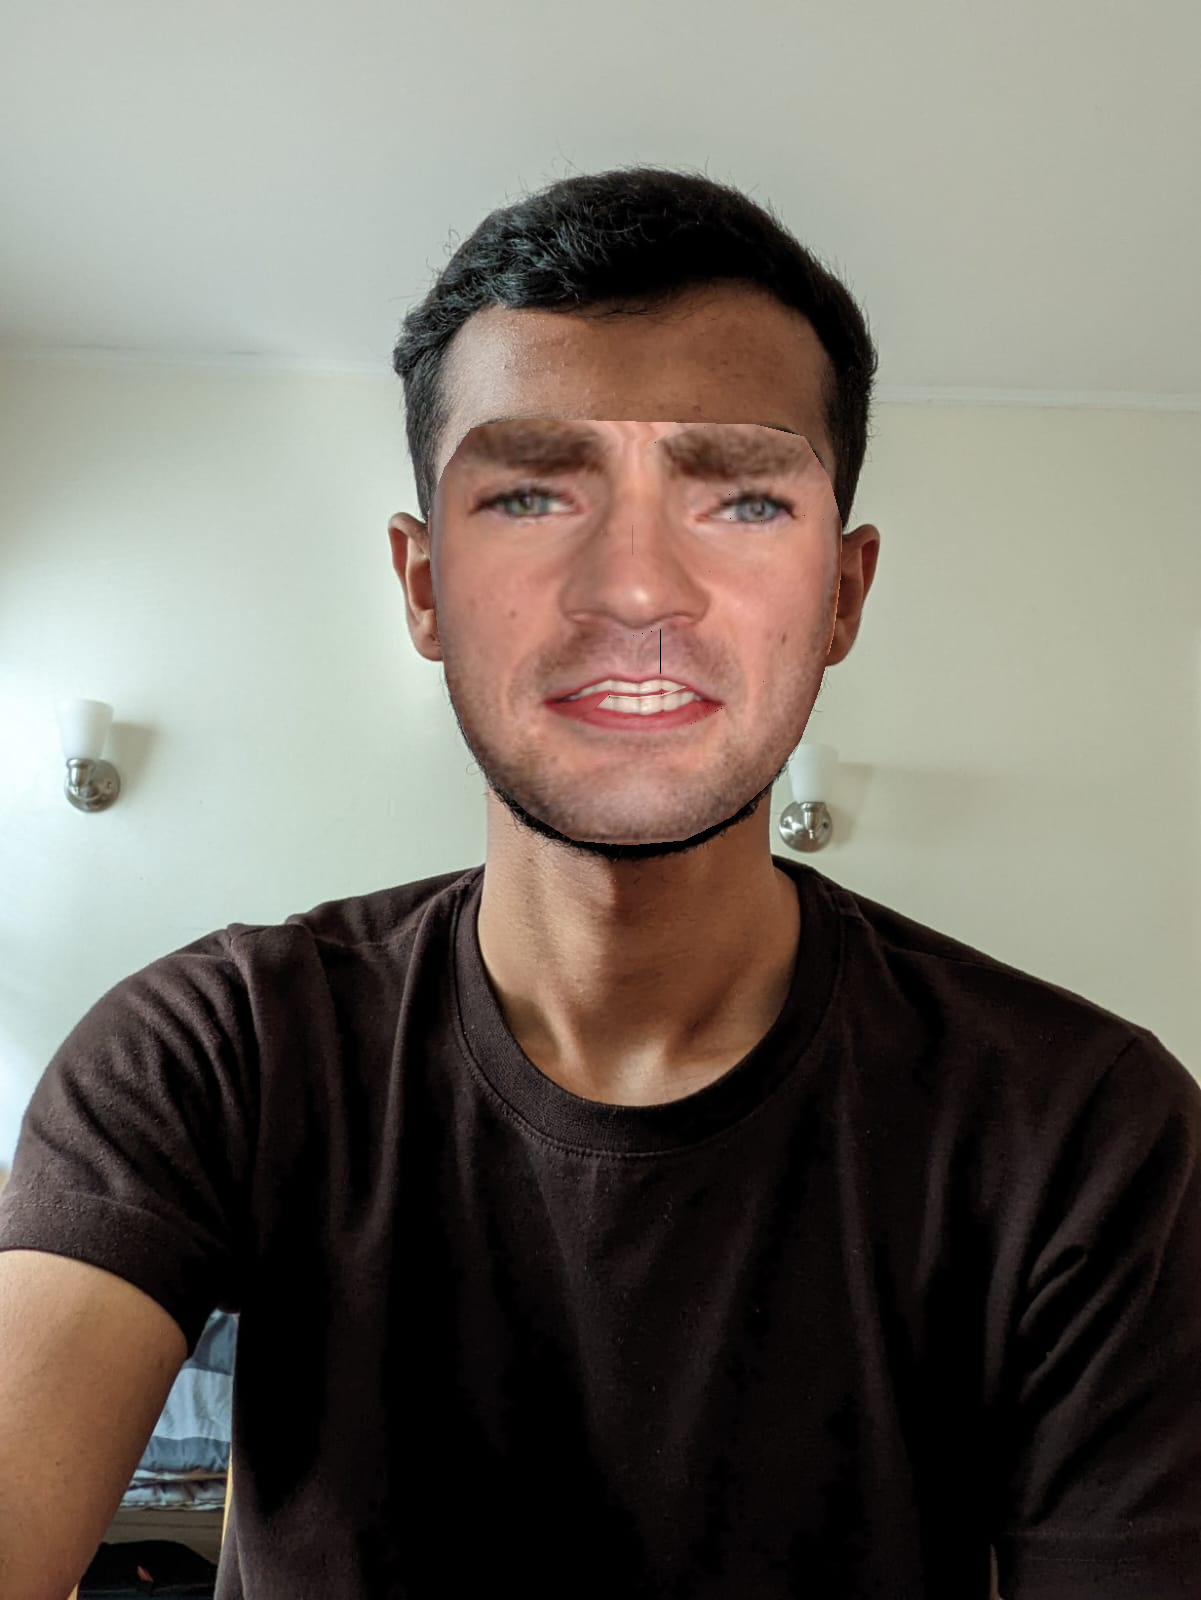

In [ ]:
cv2_imshow(dst_copy)